<a href="https://colab.research.google.com/github/keylperez/SchedulingAlgorithms/blob/main/P_SRTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shortest Remaining Time First

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Task:
    def __init__(self, processChar, burstTime, arrivalTime):
        self.processChar = processChar
        self.burstTime = burstTime
        self.remainingTime = burstTime
        self.arrivalTime = arrivalTime
        self.completionTime = 0
        self.turnAroundTime = 0
        self.waitingTime = 0
        self.executionLog = []  # Track execution intervals for plotting

    def calculateAttributes(self, time):
        self.completionTime = time
        self.turnAroundTime = self.completionTime - self.arrivalTime
        self.waitingTime = self.turnAroundTime - self.burstTime

    def __repr__(self):
        return (f"{{ Process: {self.processChar}, Burst Time: {self.burstTime}, "
                f"Arrival Time: {self.arrivalTime}, Remaining Time: {self.remainingTime}, "
                f"Waiting Time: {self.waitingTime}, Completion Time: {self.completionTime}, "
                f"Turn Around Time: {self.turnAroundTime} }}")

In [ ]:
class Process:
    def __init__(self, processArr):
        self.processArr = processArr
        self.totalTime = 0

    def calculateAverageWaitingTime(self):
        return sum([task.waitingTime for task in self.processArr]) / len(self.processArr)

    def to_dataFrame(self):
        data = {
            "Process": [task.processChar for task in self.processArr],
            "Burst": [task.burstTime for task in self.processArr],
            "Arrival": [task.arrivalTime for task in self.processArr],
            "Waiting": [task.waitingTime for task in self.processArr],
            "Completion": [task.completionTime for task in self.processArr],
            "TurnAround": [task.turnAroundTime for task in self.processArr],
        }
        return pd.DataFrame(data)

In [ ]:
while True:
    try:
        quantProcess = int(input("Input how many processes you will input: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")

taskChar = 'A'
taskArr = []

for x in range(quantProcess):
    print(f"Process {taskChar}")

    while True:
        try:
            bt = int(input("Input Burst Time: "))
            break
        except:
            print("Please input integers!!!")

    while True:
        try:
            at = int(input("Input Arrival Time: "))
            break
        except:
            print("Please input integers!!!")

    taskArr.append(Task(taskChar, bt, at))
    taskChar = chr(ord(taskChar) + 1)

finalProcess = Process(taskArr)

Input how many processes you will input: 4
Process A
Input Burst Time: 3
Input Arrival Time: 0
Process B
Input Burst Time: 5
Input Arrival Time: 2
Process C
Input Burst Time: 2
Input Arrival Time: 2
Process D
Input Burst Time: 6
Input Arrival Time: 3


In [ ]:
def printTasks(Object):
    for obj in Object.processArr:
        print(obj)

printTasks(finalProcess)

{ Process: A, Burst Time: 3, Arrival Time: 0, Remaining Time: 3, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: B, Burst Time: 5, Arrival Time: 2, Remaining Time: 5, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: C, Burst Time: 2, Arrival Time: 2, Remaining Time: 2, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }
{ Process: D, Burst Time: 6, Arrival Time: 3, Remaining Time: 6, Waiting Time: 0, Completion Time: 0, Turn Around Time: 0 }


In [ ]:
def startProcess(Object):
    currentTime = 0
    completed_tasks = 0
    total_tasks = len(Object.processArr)
    task_queue = []

    while completed_tasks < total_tasks:
        # Add tasks that have arrived by the current time to the queue
        for task in Object.processArr:
            if task.arrivalTime == currentTime and task not in task_queue and task.remainingTime > 0:
                task_queue.append(task)

        # Sort the task queue by remaining time (shortest first), and arrival time if tied
        task_queue.sort(key=lambda p: (p.remainingTime, p.arrivalTime))

        if task_queue:
            # Pick the task with the shortest remaining time
            current_task = task_queue[0]

            # Execute the task for 1 time unit
            current_task.executionLog.append(currentTime)
            current_task.remainingTime -= 1
            currentTime += 1

            if current_task.remainingTime == 0:
                # If the task is completed, calculate its attributes and remove it from the queue
                current_task.calculateAttributes(currentTime)
                task_queue.pop(0)
                completed_tasks += 1
        else:
            # If no tasks are ready, increment time
            currentTime += 1

    Object.totalTime = currentTime


startProcess(finalProcess)

In [ ]:
df = finalProcess.to_dataFrame()
print(df)

  Process  Burst  Arrival  Waiting  Completion  TurnAround
0       A      3        0        0           3           3
1       B      5        2        3          10           8
2       C      2        2        1           5           3
3       D      6        3        7          16          13


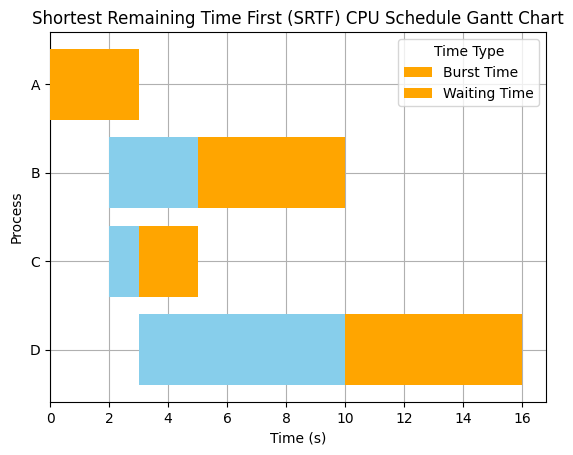

In [ ]:

# Plot Gantt Chart with Waiting Time
fig, gnt = plt.subplots()

# Create Gantt chart intervals for each process
for task in finalProcess.processArr:
    # Execution intervals
    execution_intervals = task.executionLog
    for i in range(len(execution_intervals)):
        plt.barh(task.processChar, 1, left=execution_intervals[i], color="orange", zorder=3)

    # Waiting intervals
    for t in range(task.arrivalTime, task.completionTime):
        if t not in execution_intervals:
            plt.barh(task.processChar, 1, left=t, color="skyblue", zorder=2)

plt.title("Shortest Remaining Time First (SRTF) CPU Schedule Gantt Chart")
plt.gca().invert_yaxis()
gnt.grid(True, zorder=1)
gnt.set_ylabel("Process")
gnt.set_xlabel("Time (s)")
plt.legend(["Burst Time", "Waiting Time"], title="Time Type")
plt.show()

In [ ]:
print("Average Waiting Time:", finalProcess.calculateAverageWaitingTime(), "s")
print("Total Time:", int(finalProcess.totalTime), "s")

Average Waiting Time: 2.75 s
Total Time: 16 s
